# Finding RNG seeds for test scenarios

This notebook demonstrates how to "search" for seeds that satisfy certain requirements, such as all users being located close to a particular base station. This approach can be used to find interesting sequences of seeds to test the trained RL agents on.

In [1]:
import IPython.display
import collections
import multiprocessing

import simulator
import visualizer

In [2]:
def test_seed(seed):
    sim = simulator.SimulatorSubprocess([seed], mock=True)
    sim.run_parse_loop(break_on_interaction=True)
    sim.quit()
    cell_assocs = [sim.get_value('ue', ue, 'cell_associated') for ue in sim.get_objects('ue')]
    assoc_counts = collections.Counter(cell_assocs)
    # Interested in all seeds where users are spread among maximum 2 base stations
    if len(assoc_counts) <= 2:
        return (tuple(sorted(assoc_counts.keys())), sim.output_log)
    return (None, '')

In [ ]:
pool = multiprocessing.Pool(10)
seeds = range(1, 1000)
results = list(zip(seeds, pool.map(test_seed, seeds)))

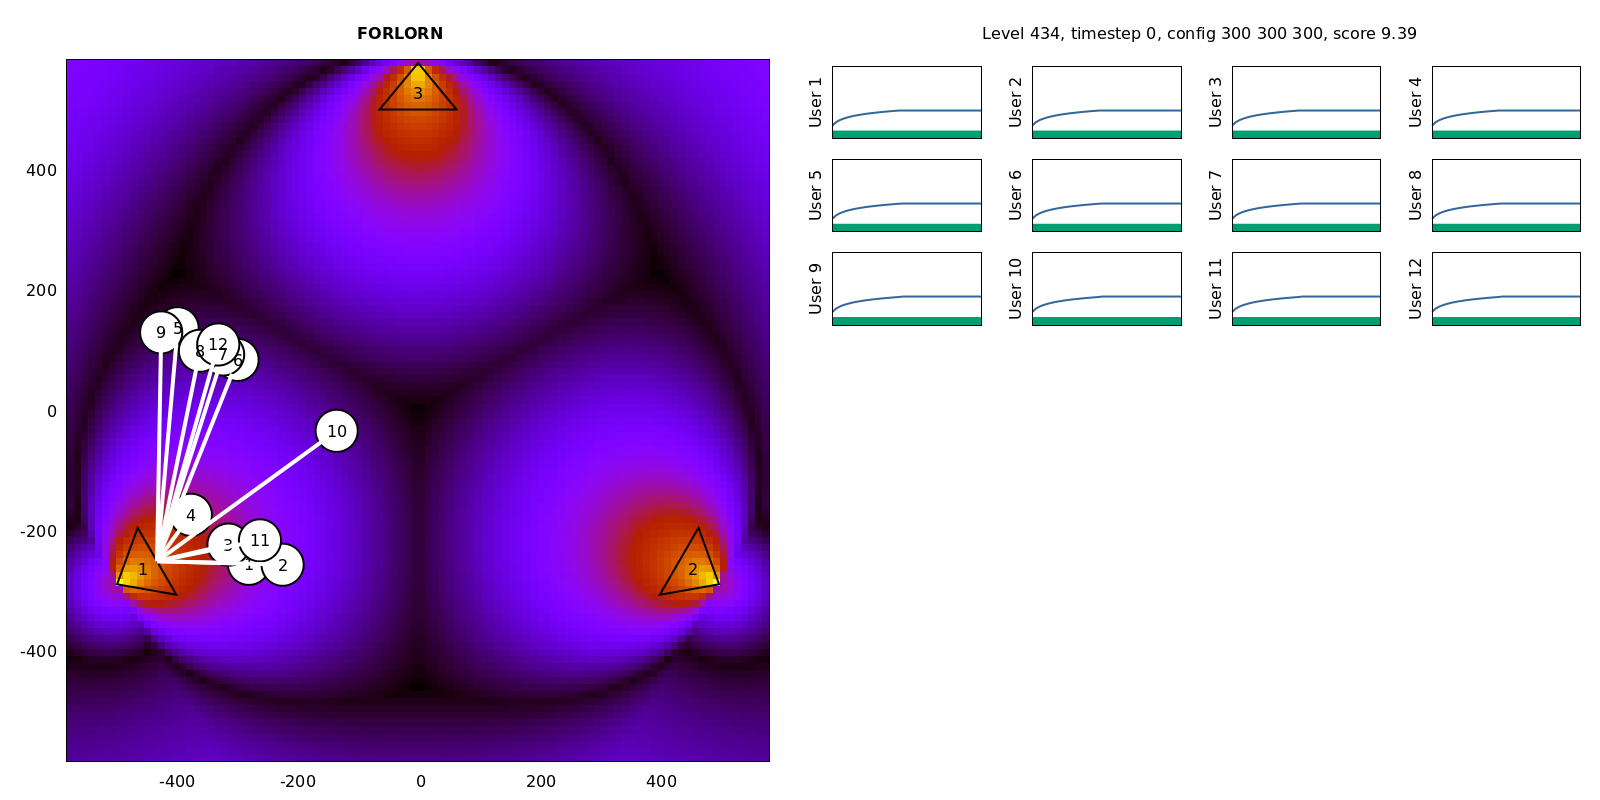

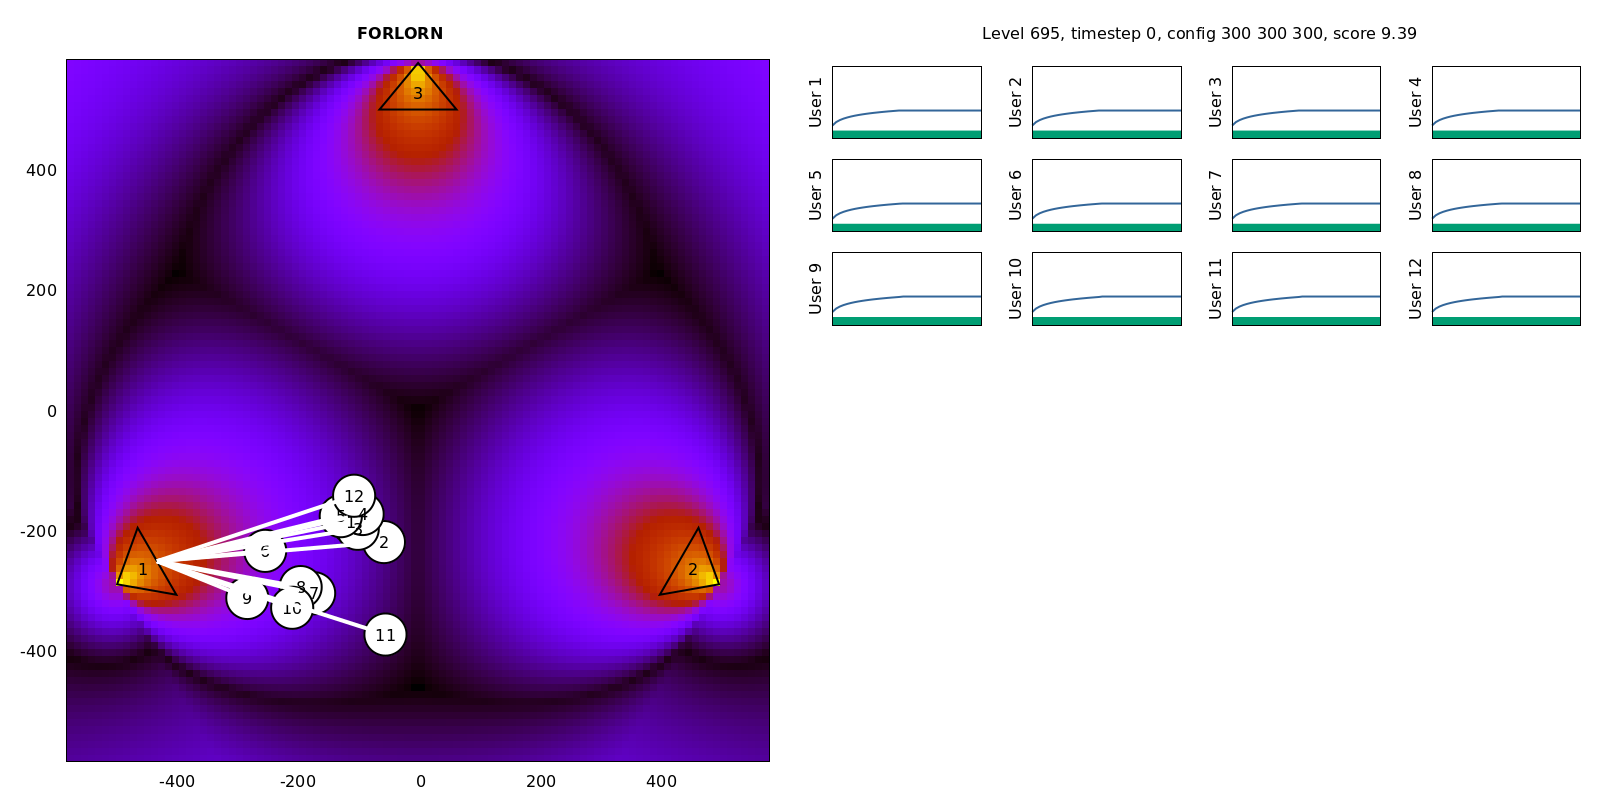

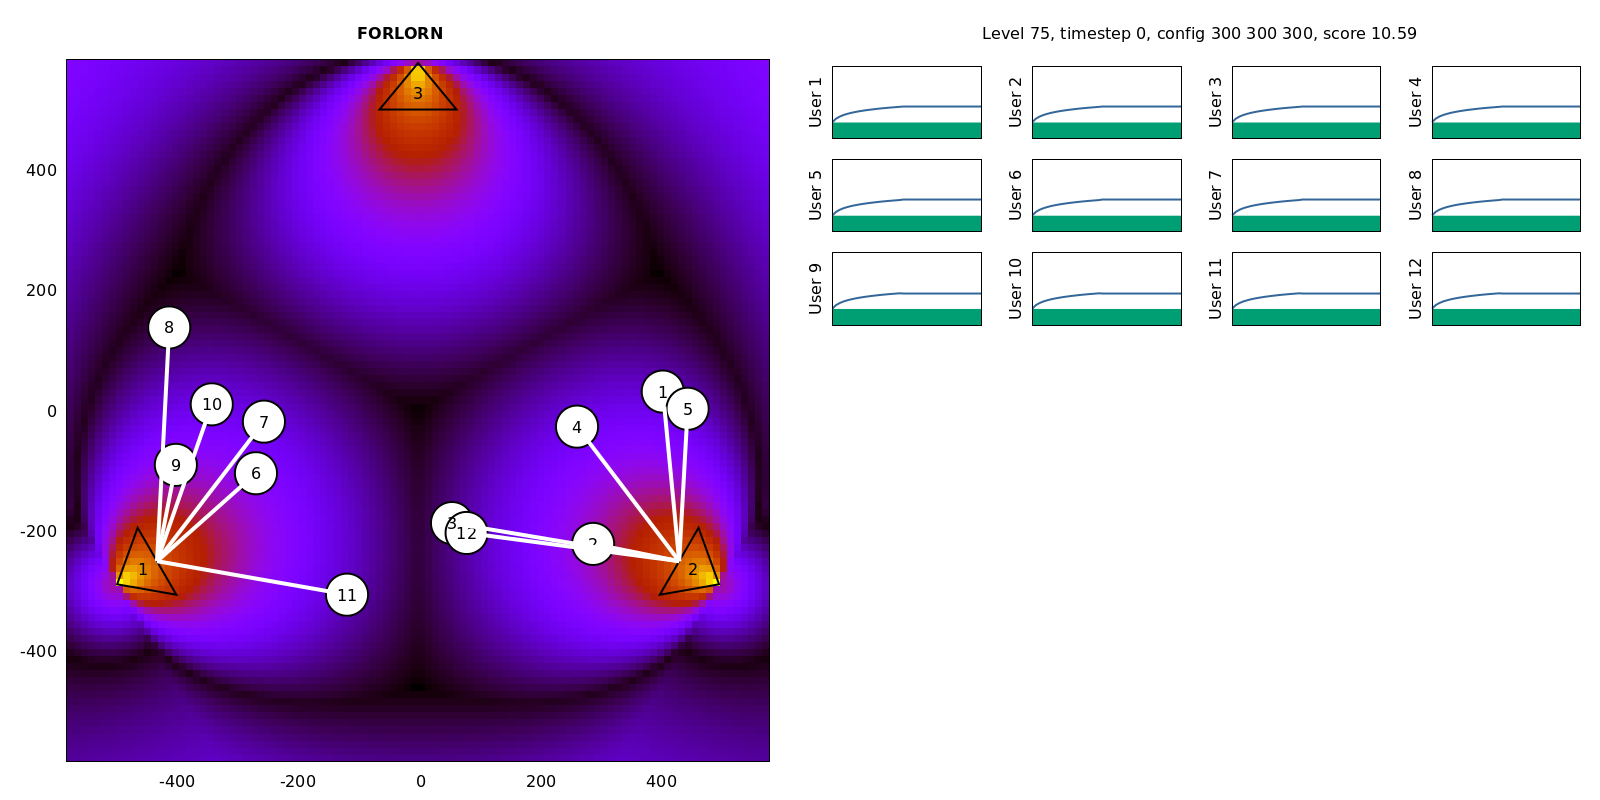

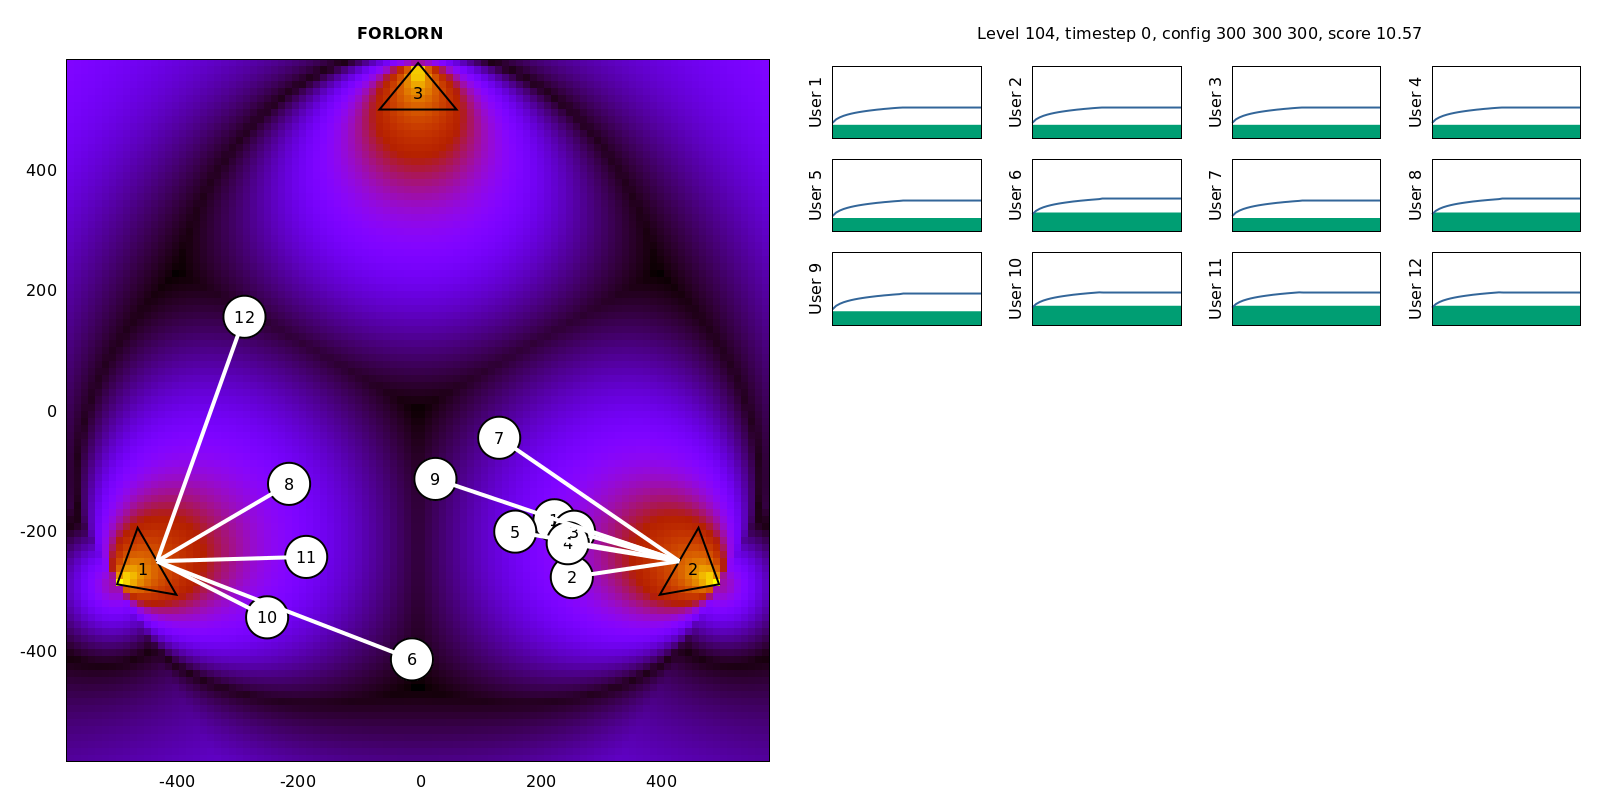

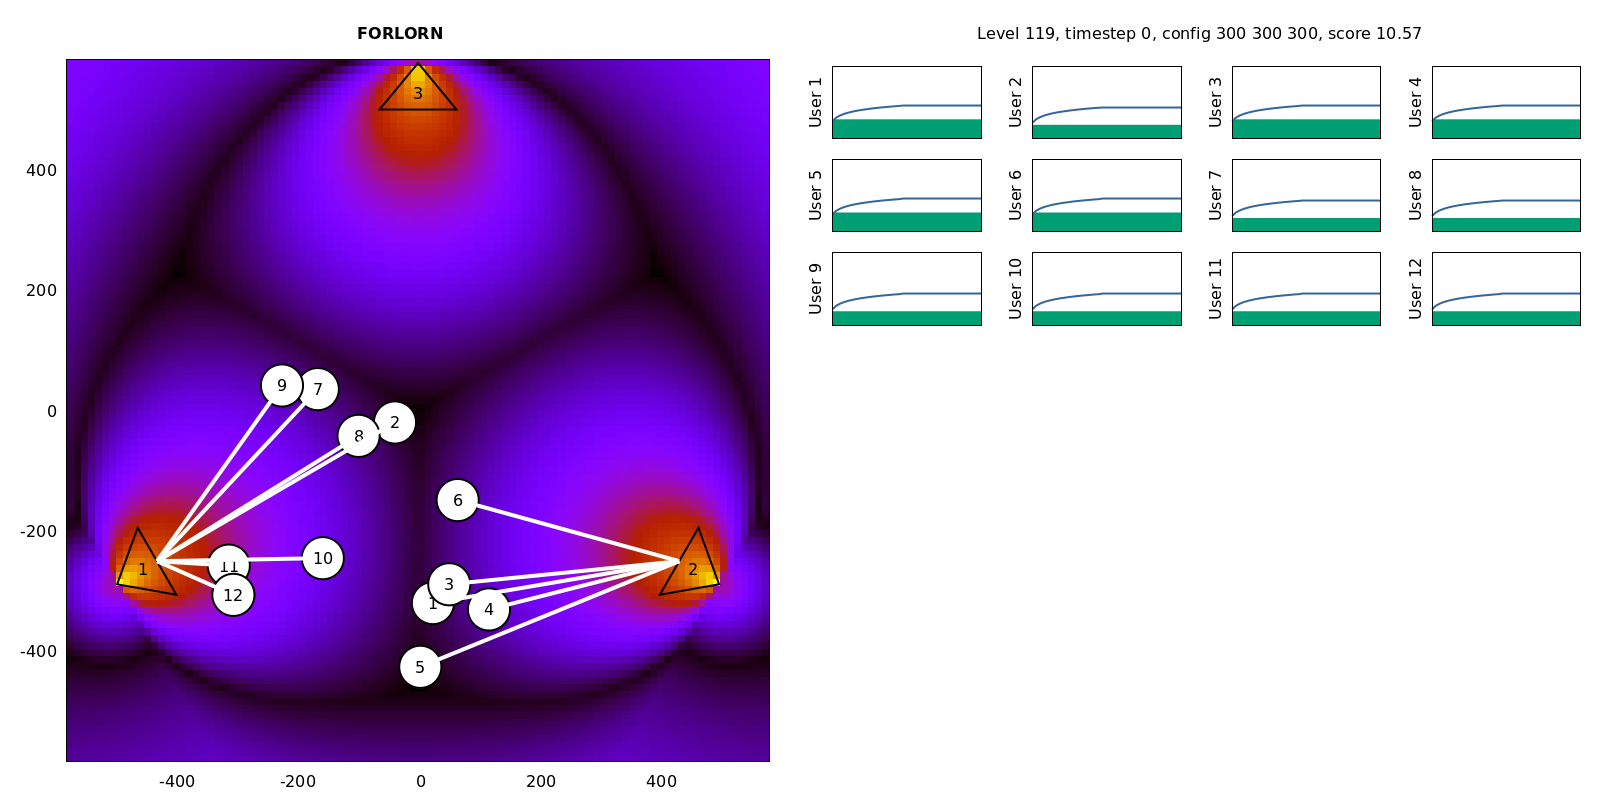

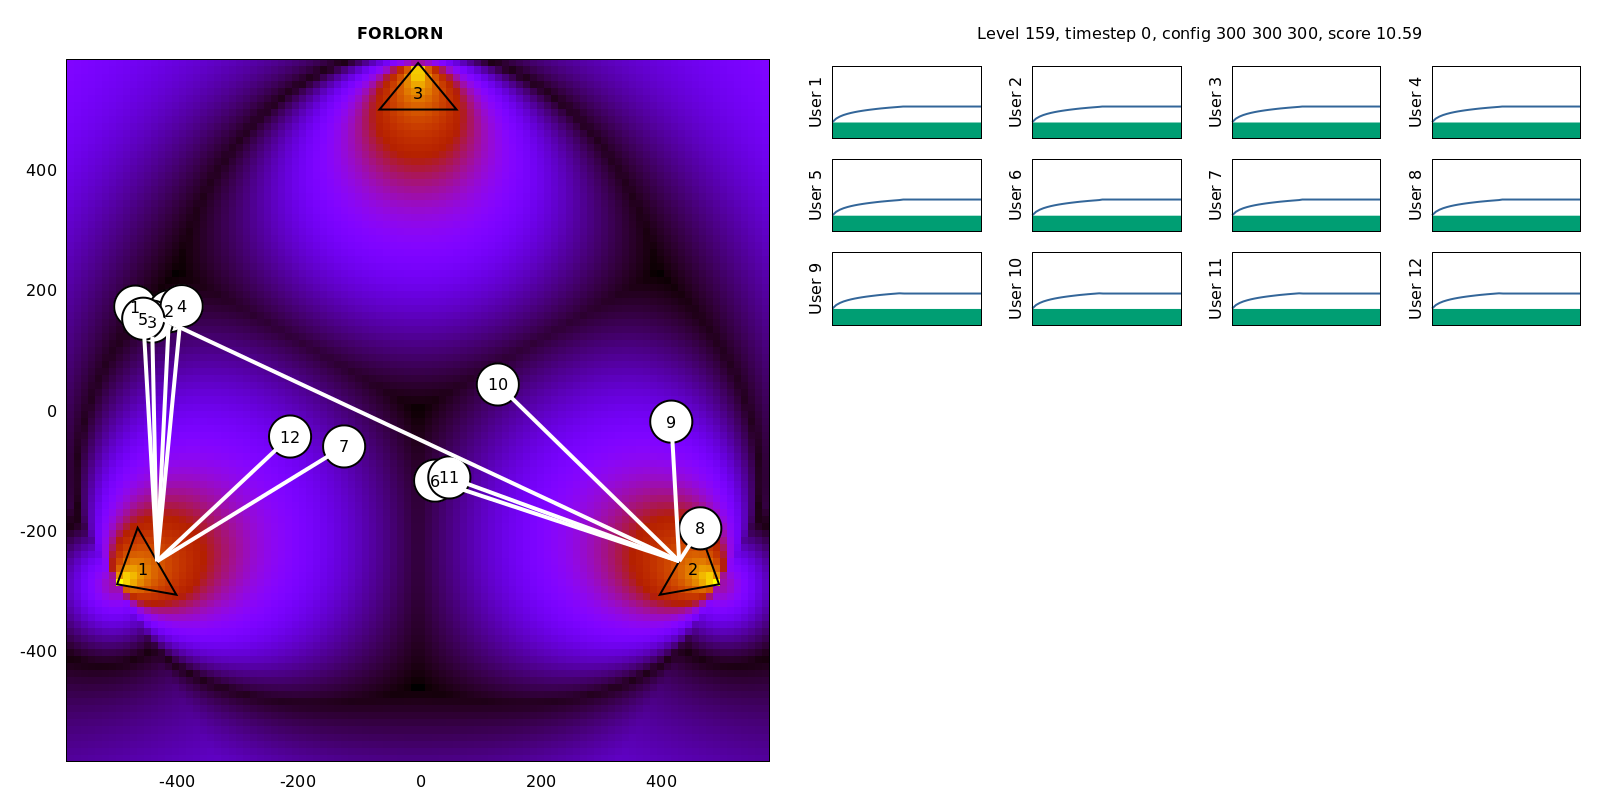

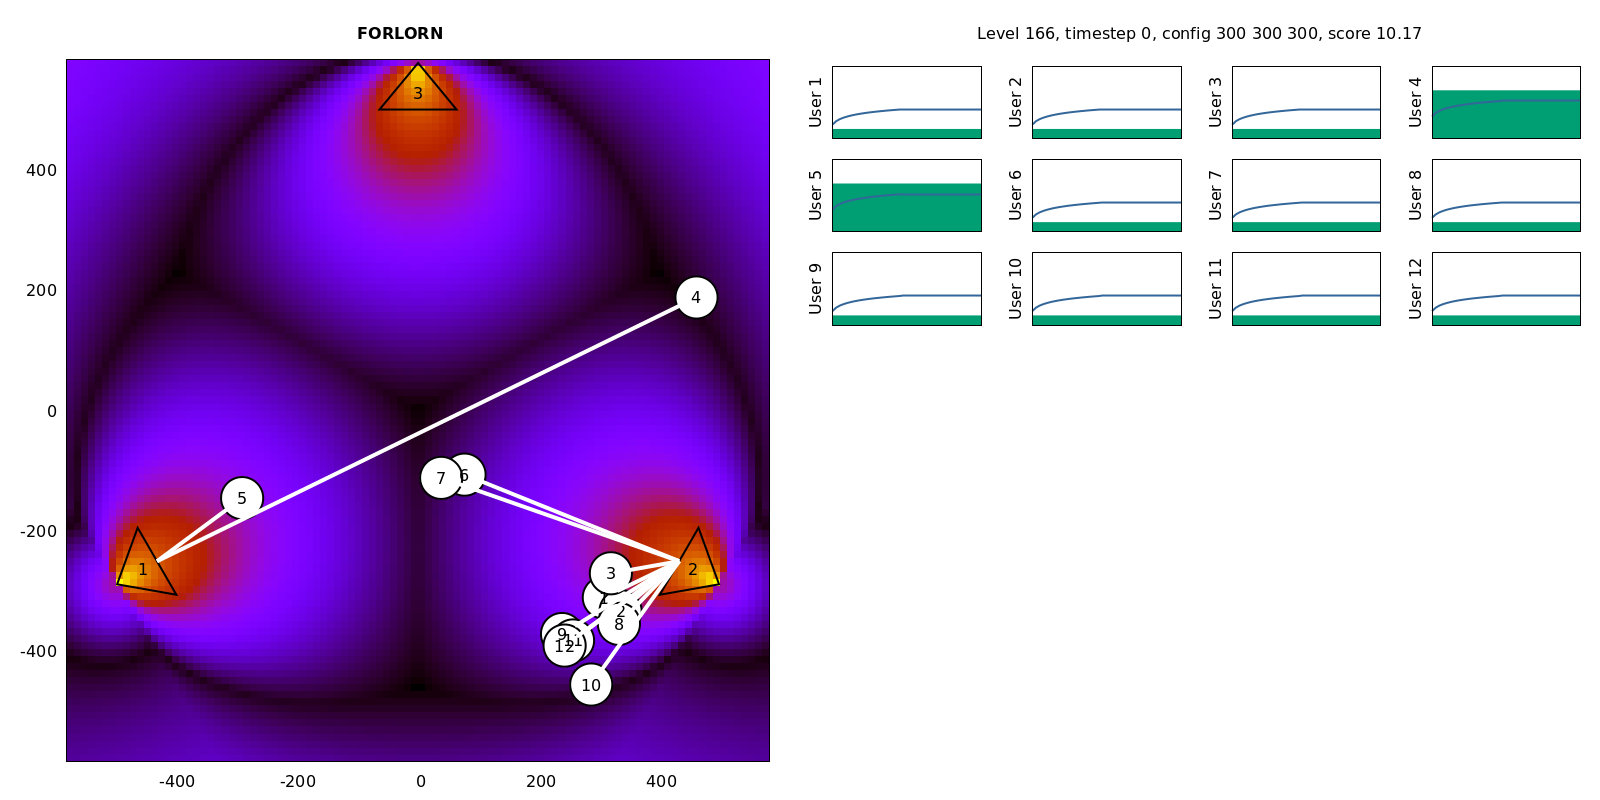

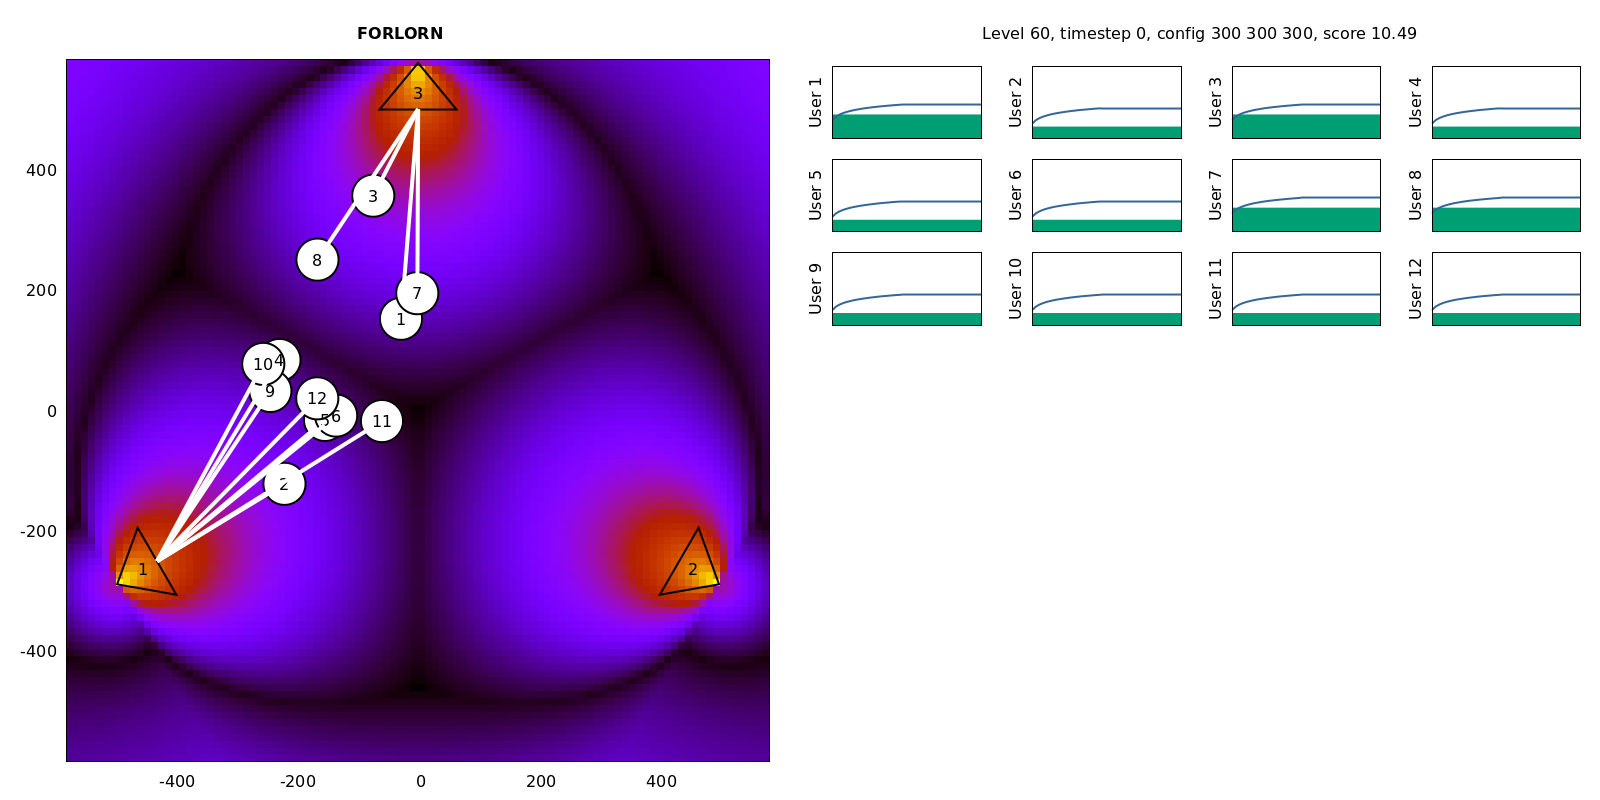

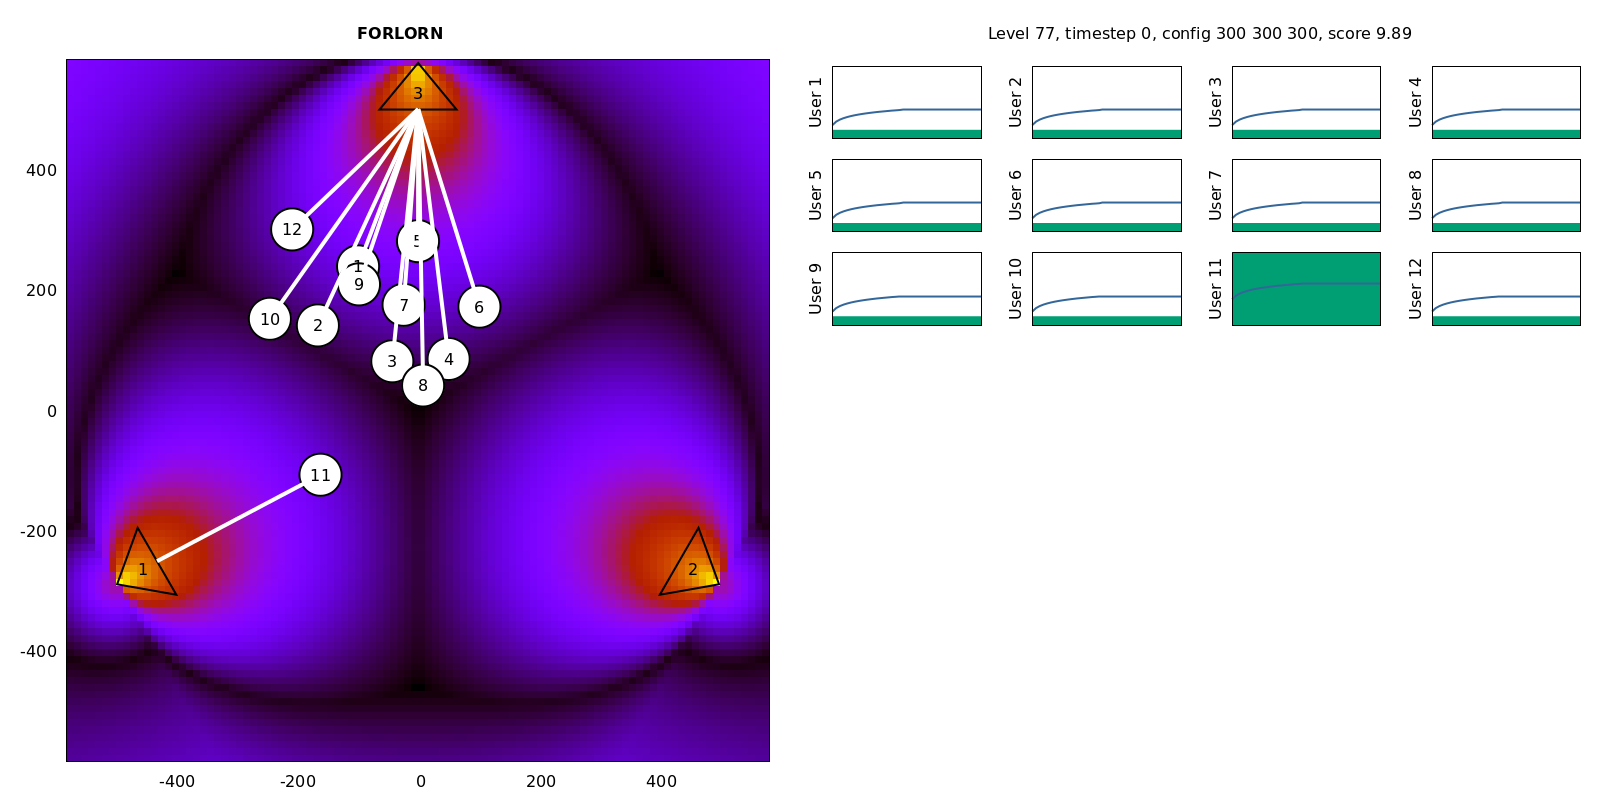

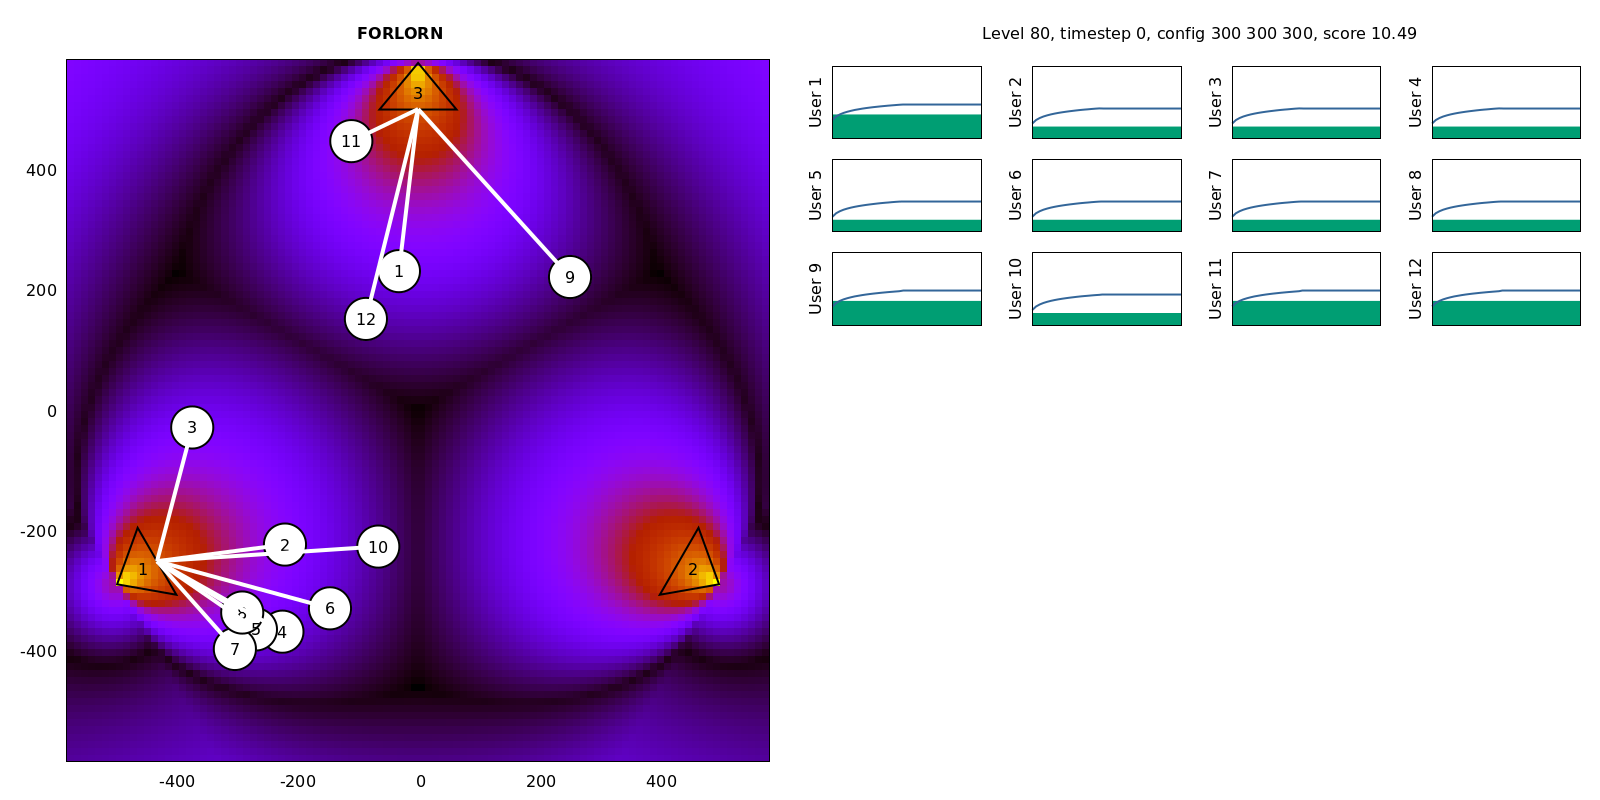

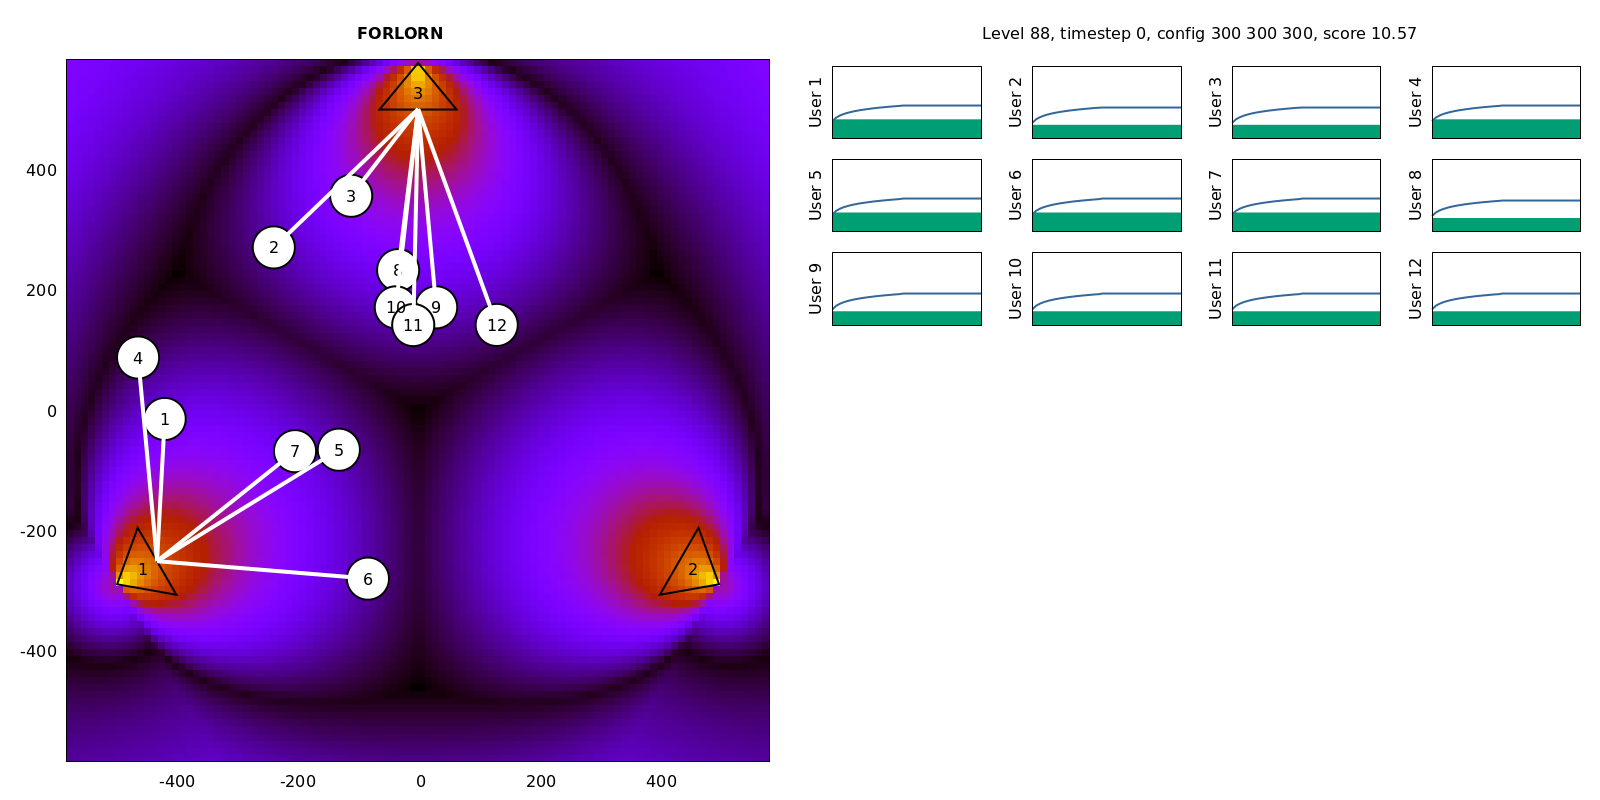

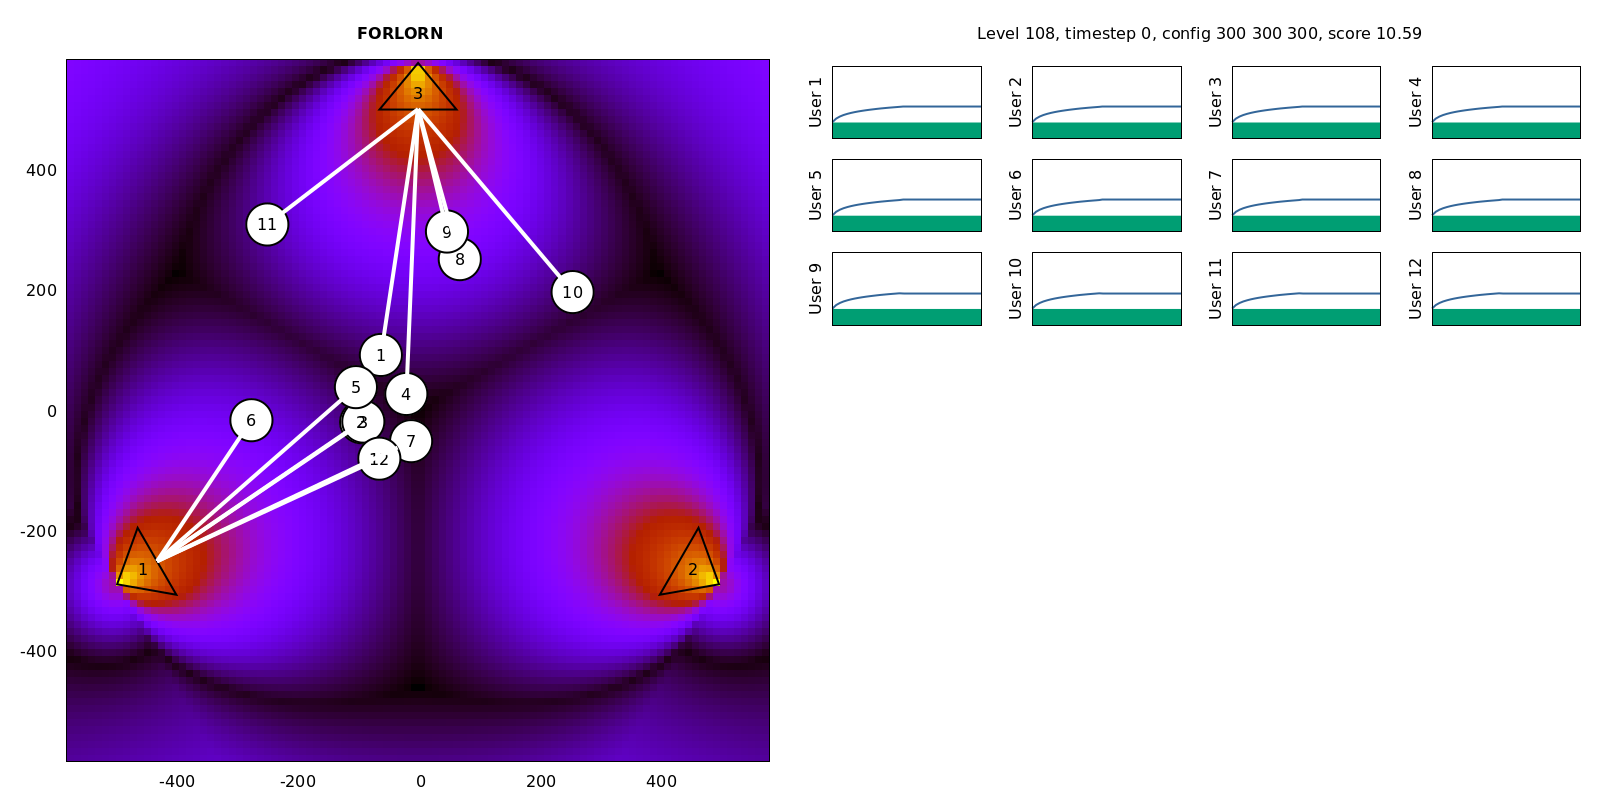

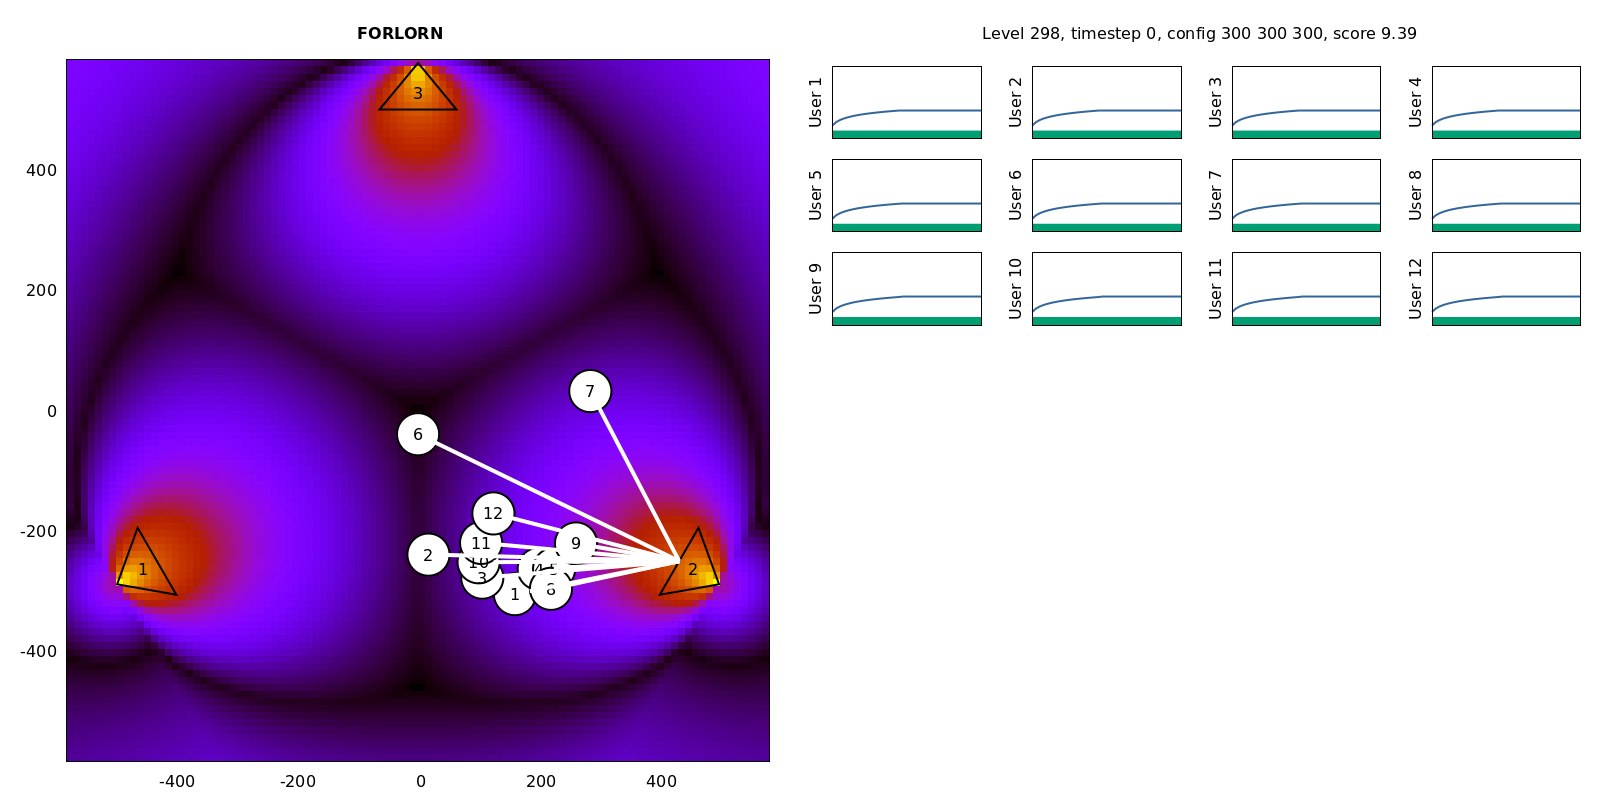

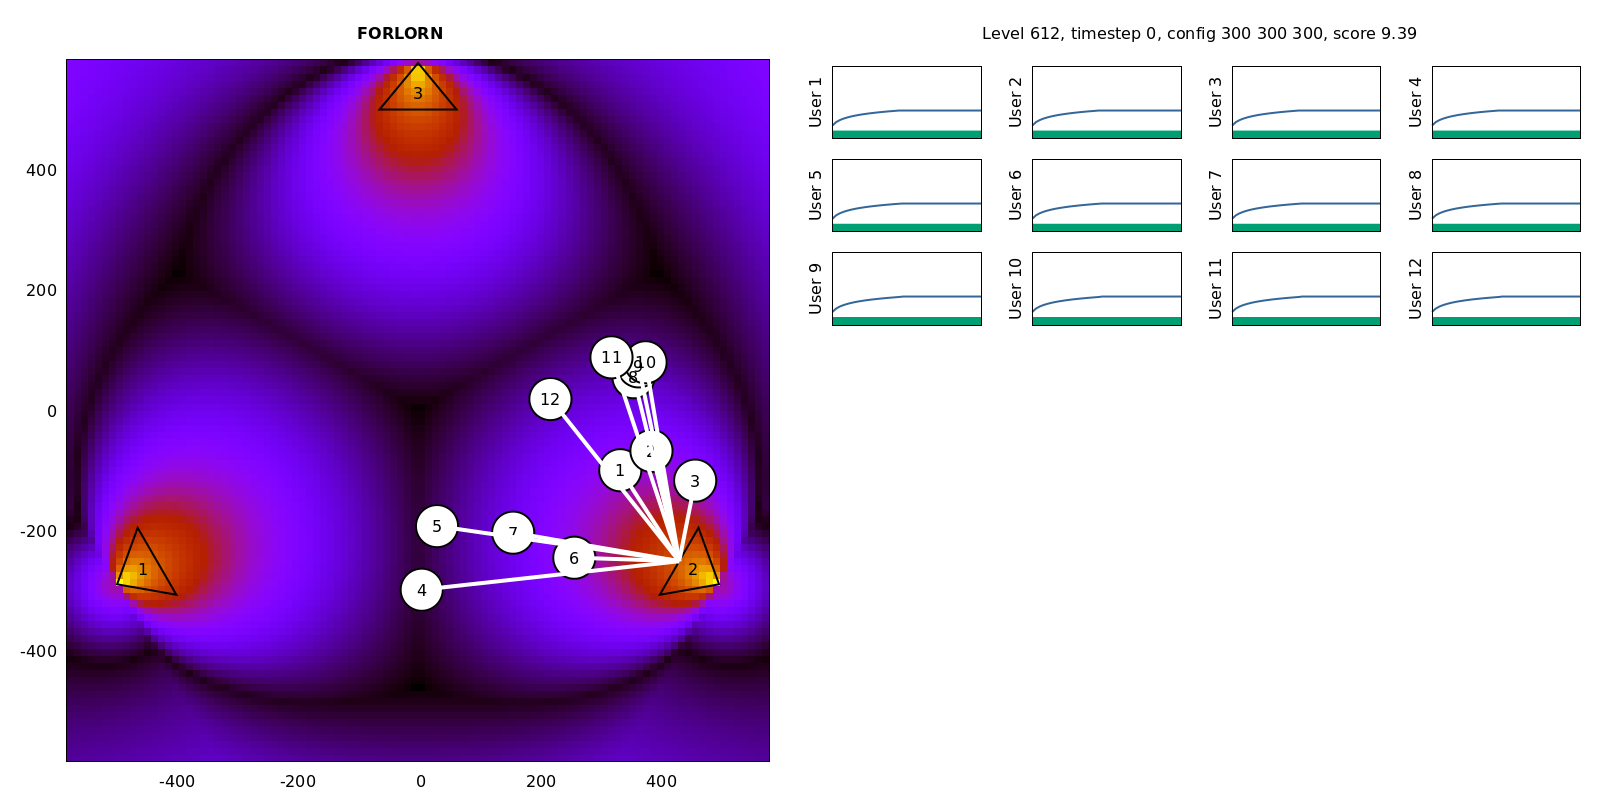

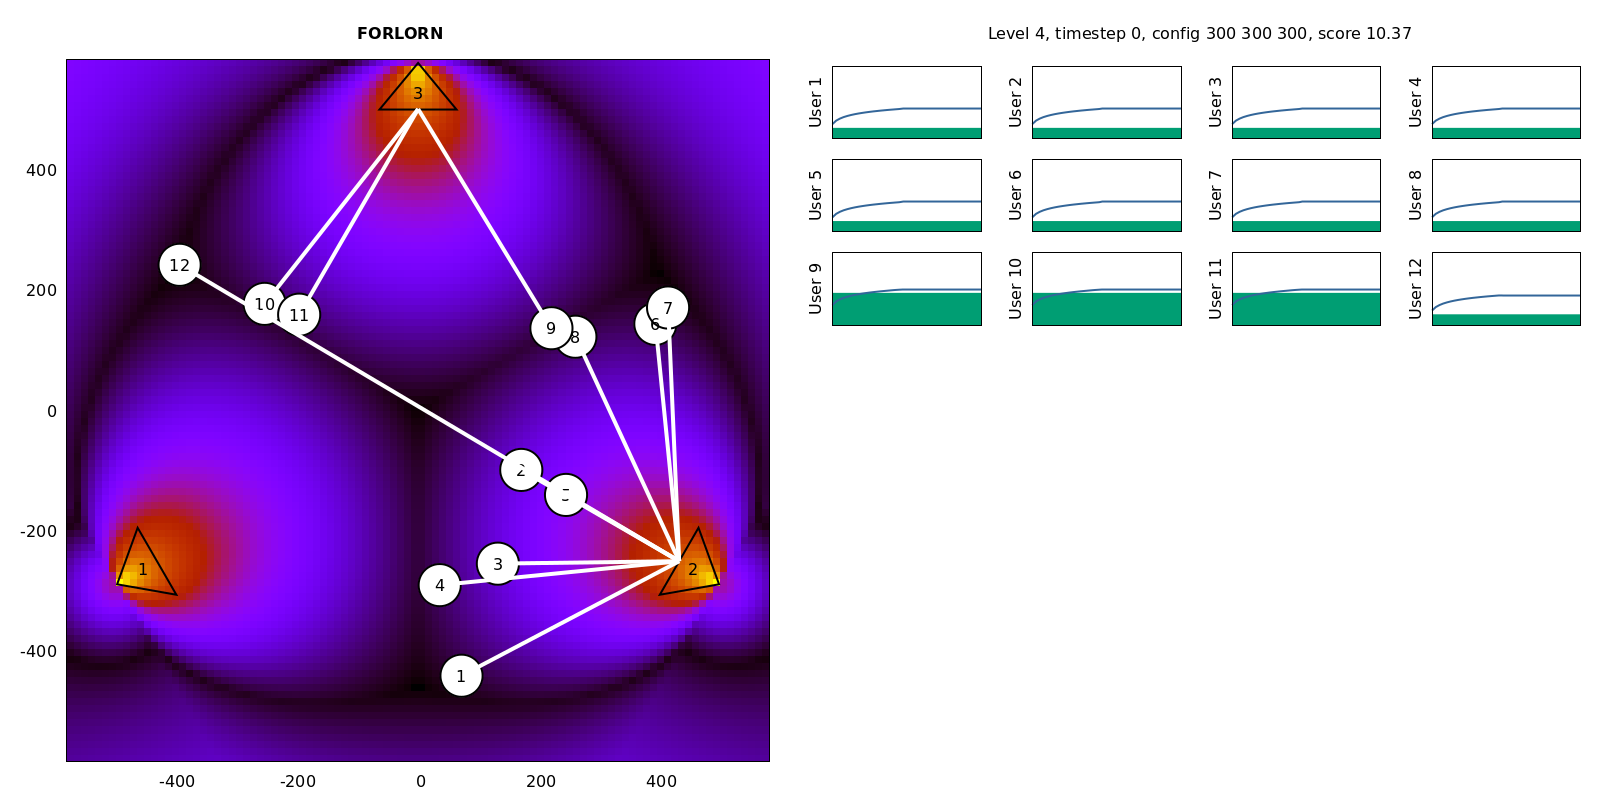

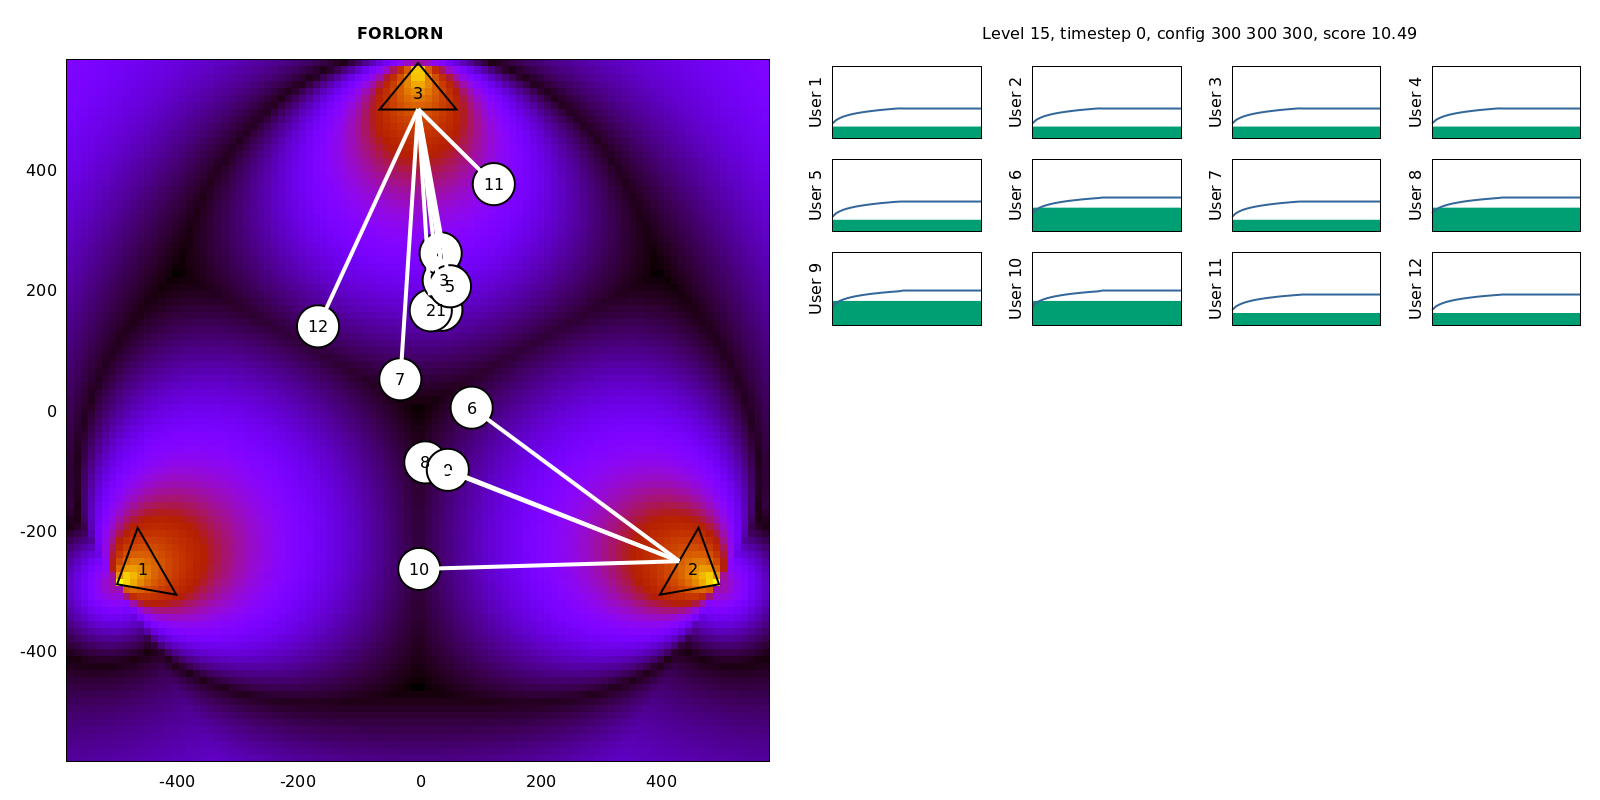

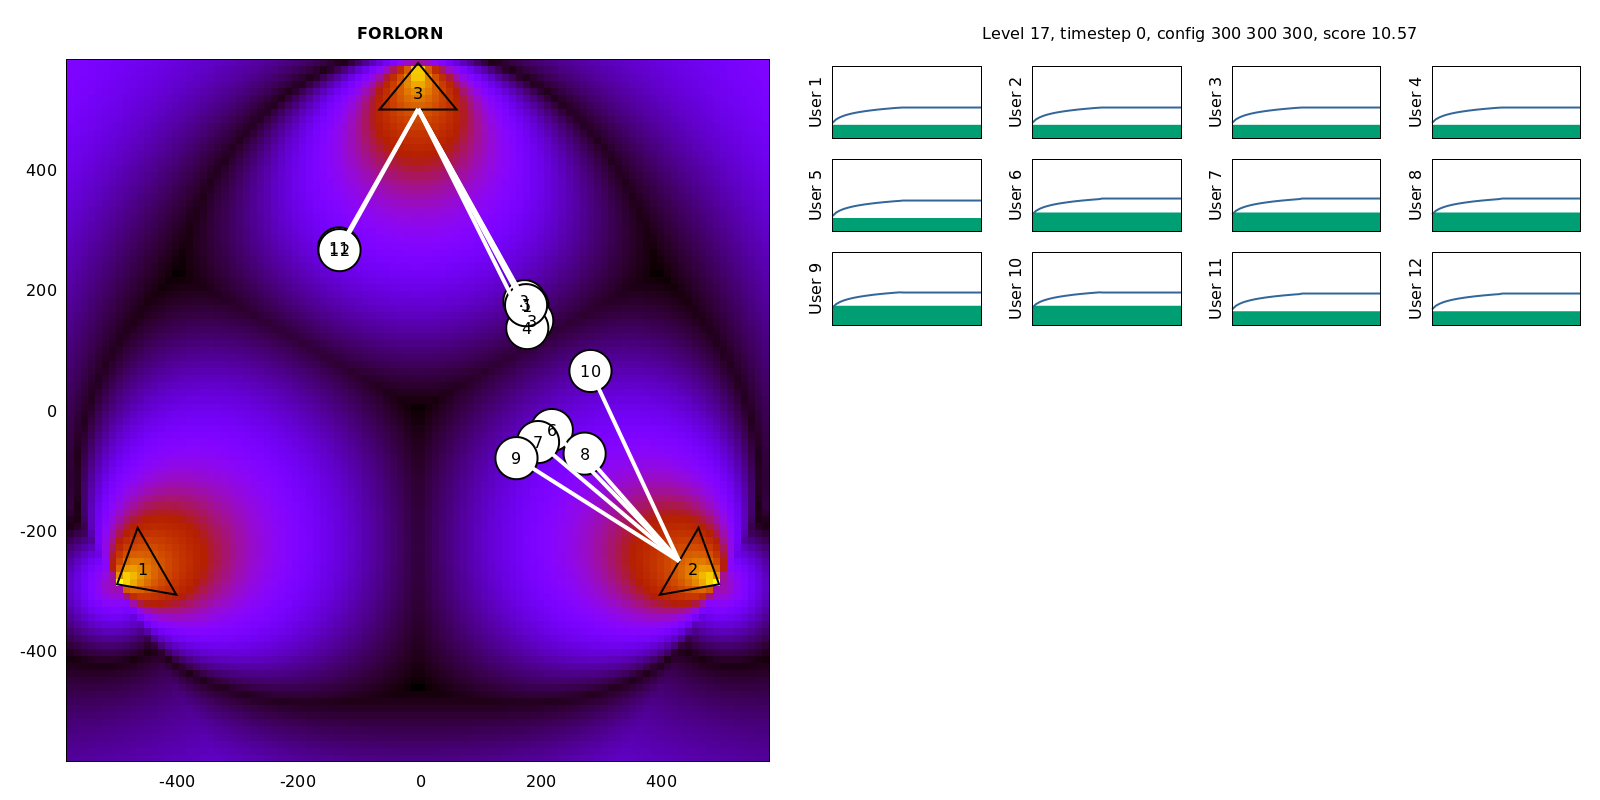

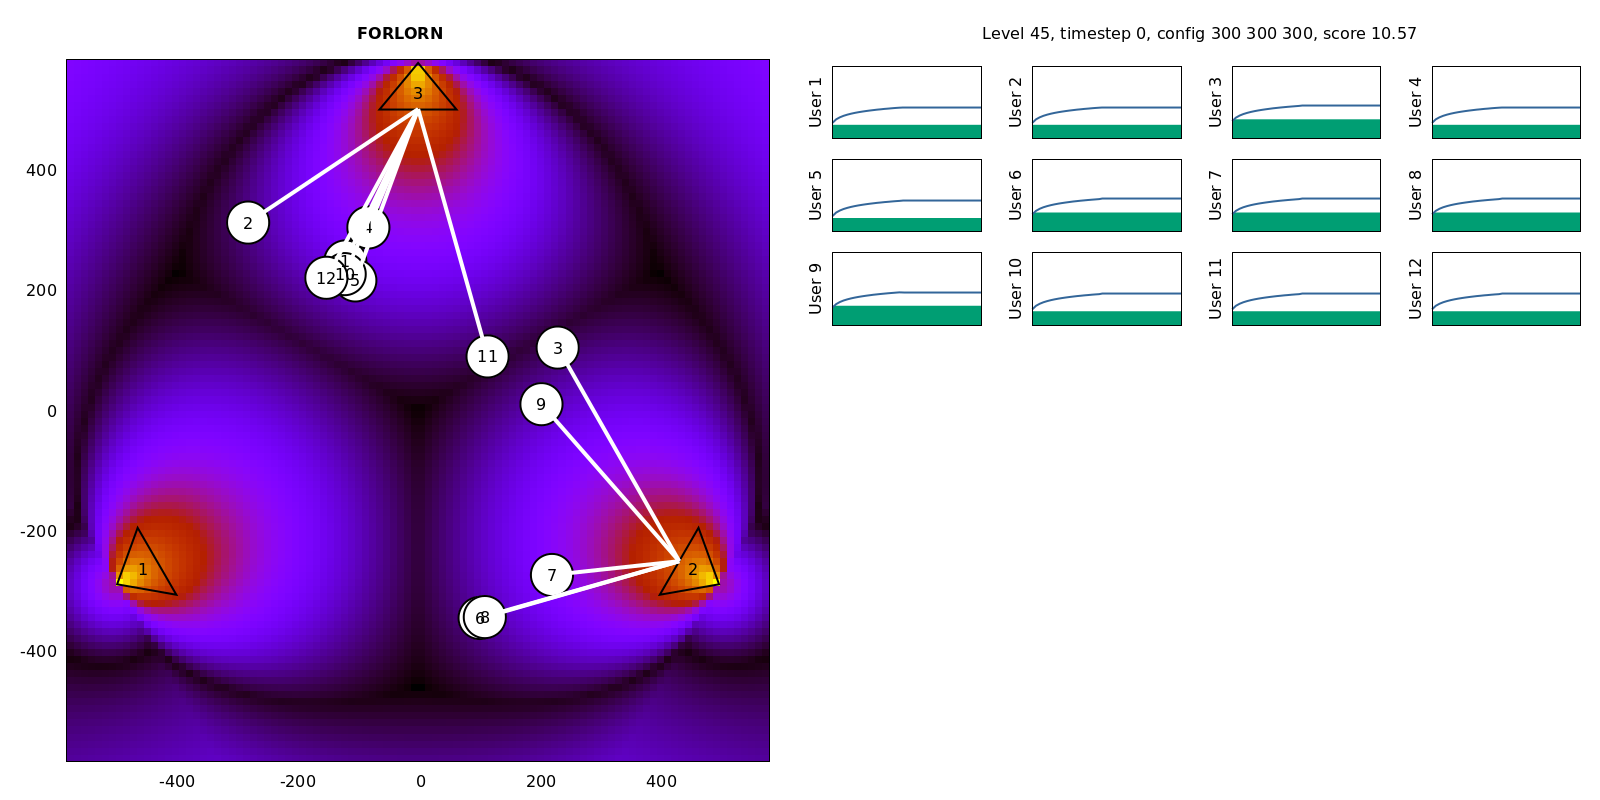

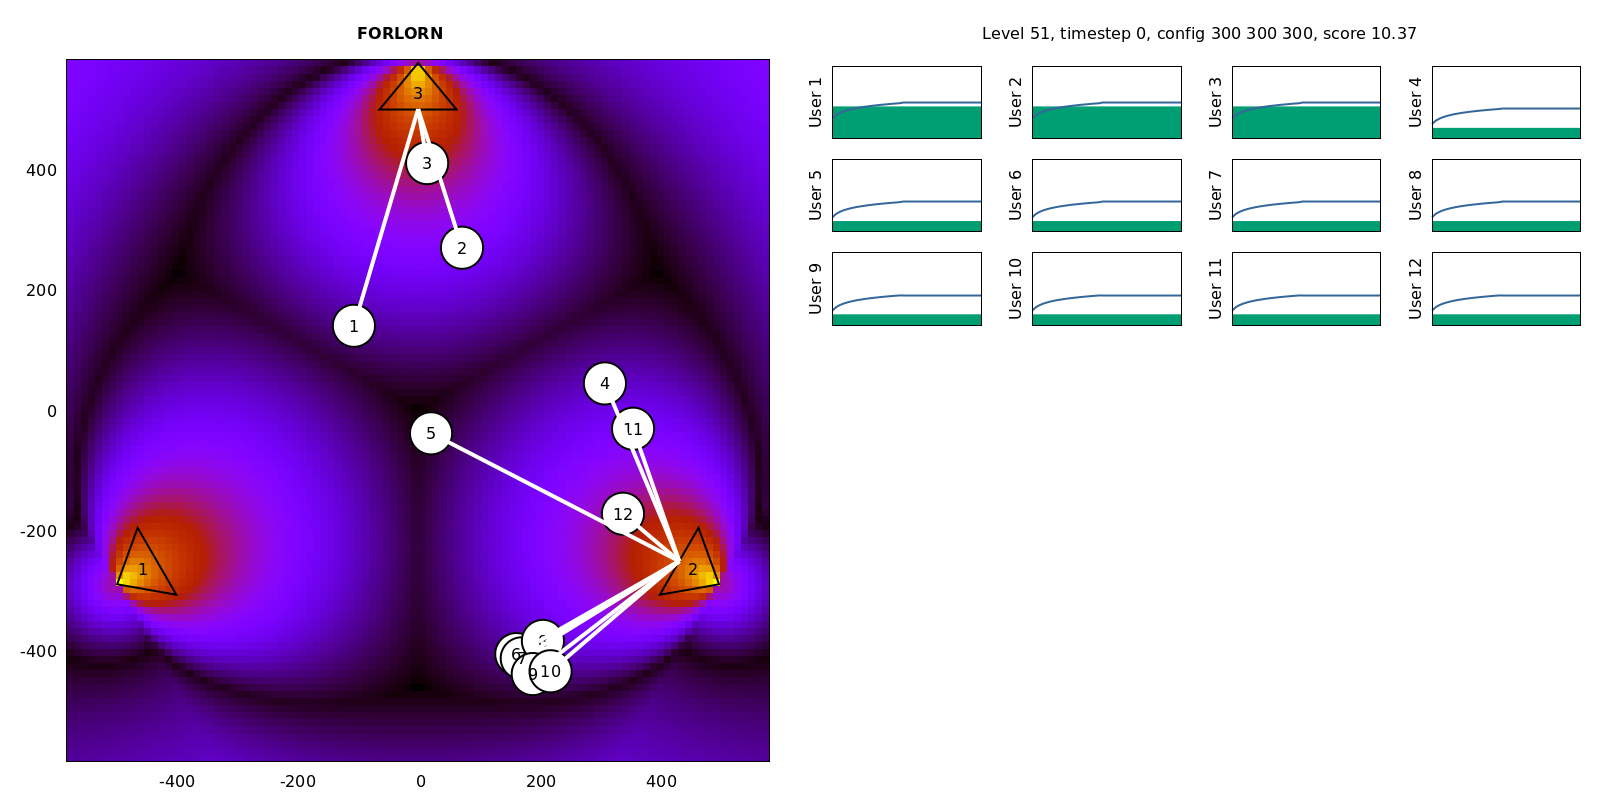

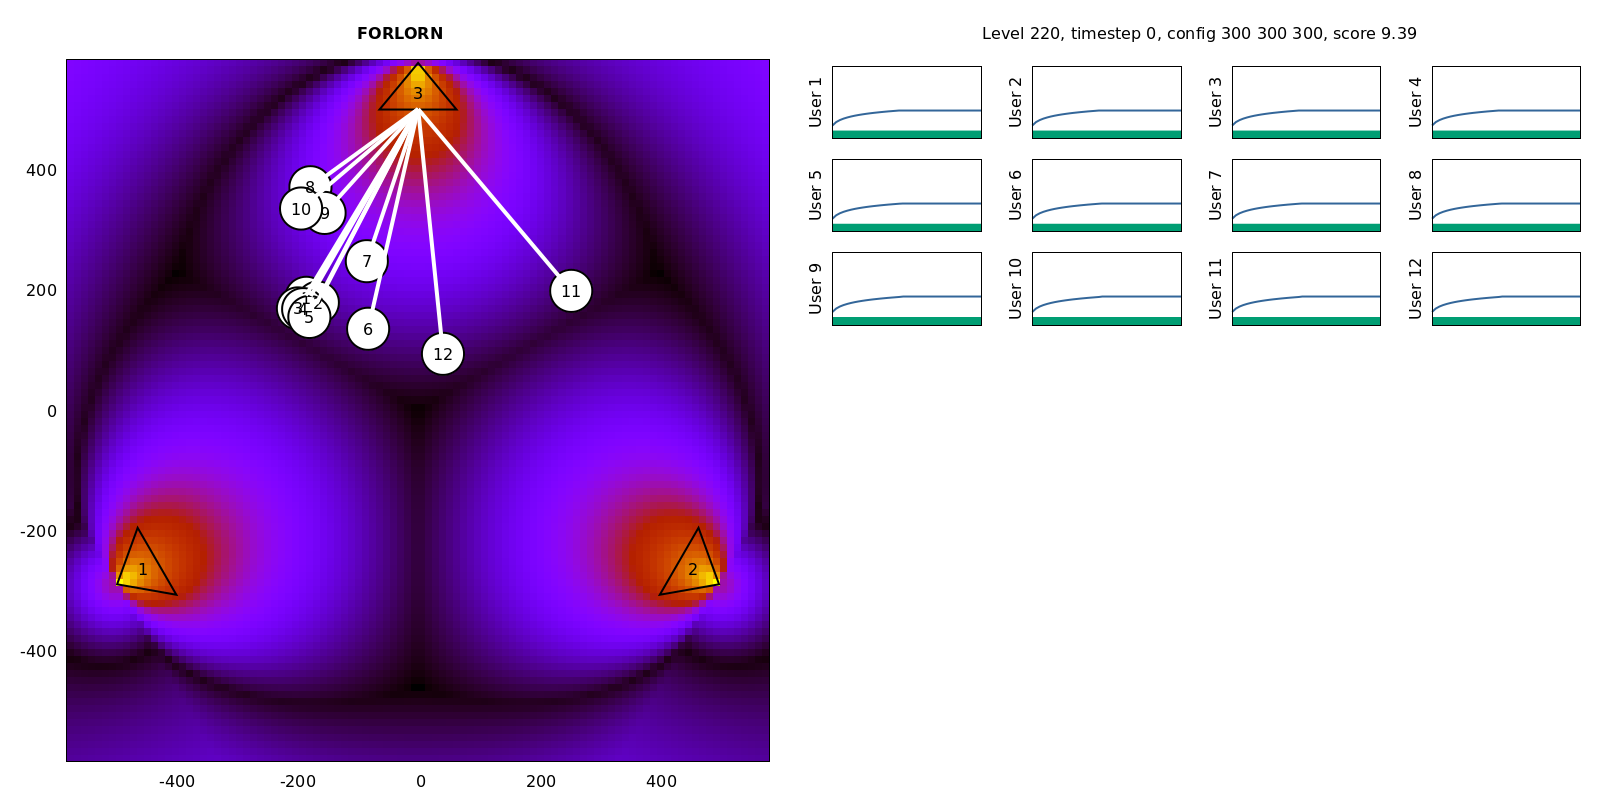

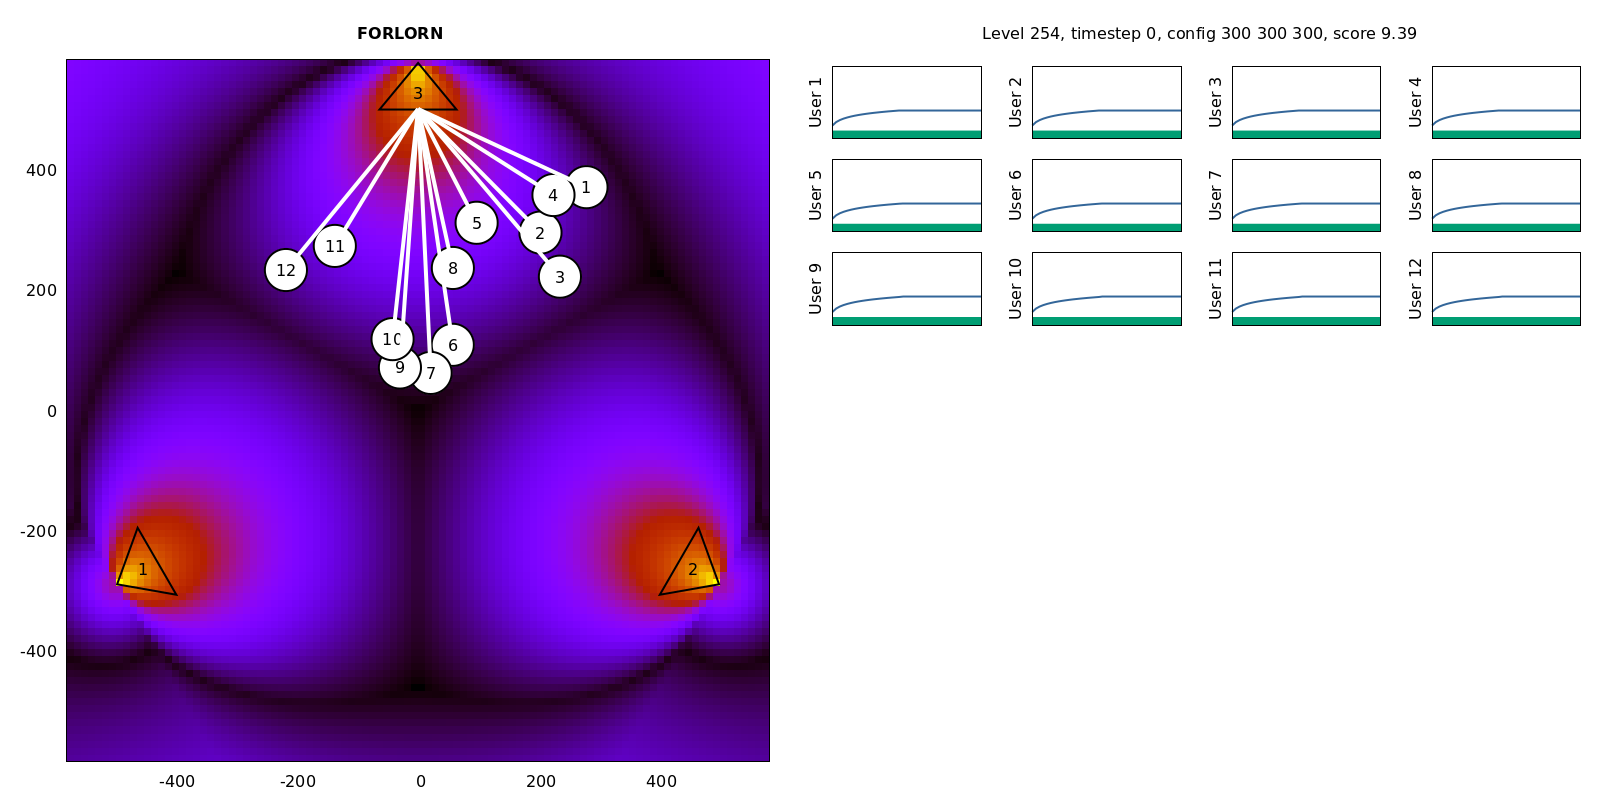

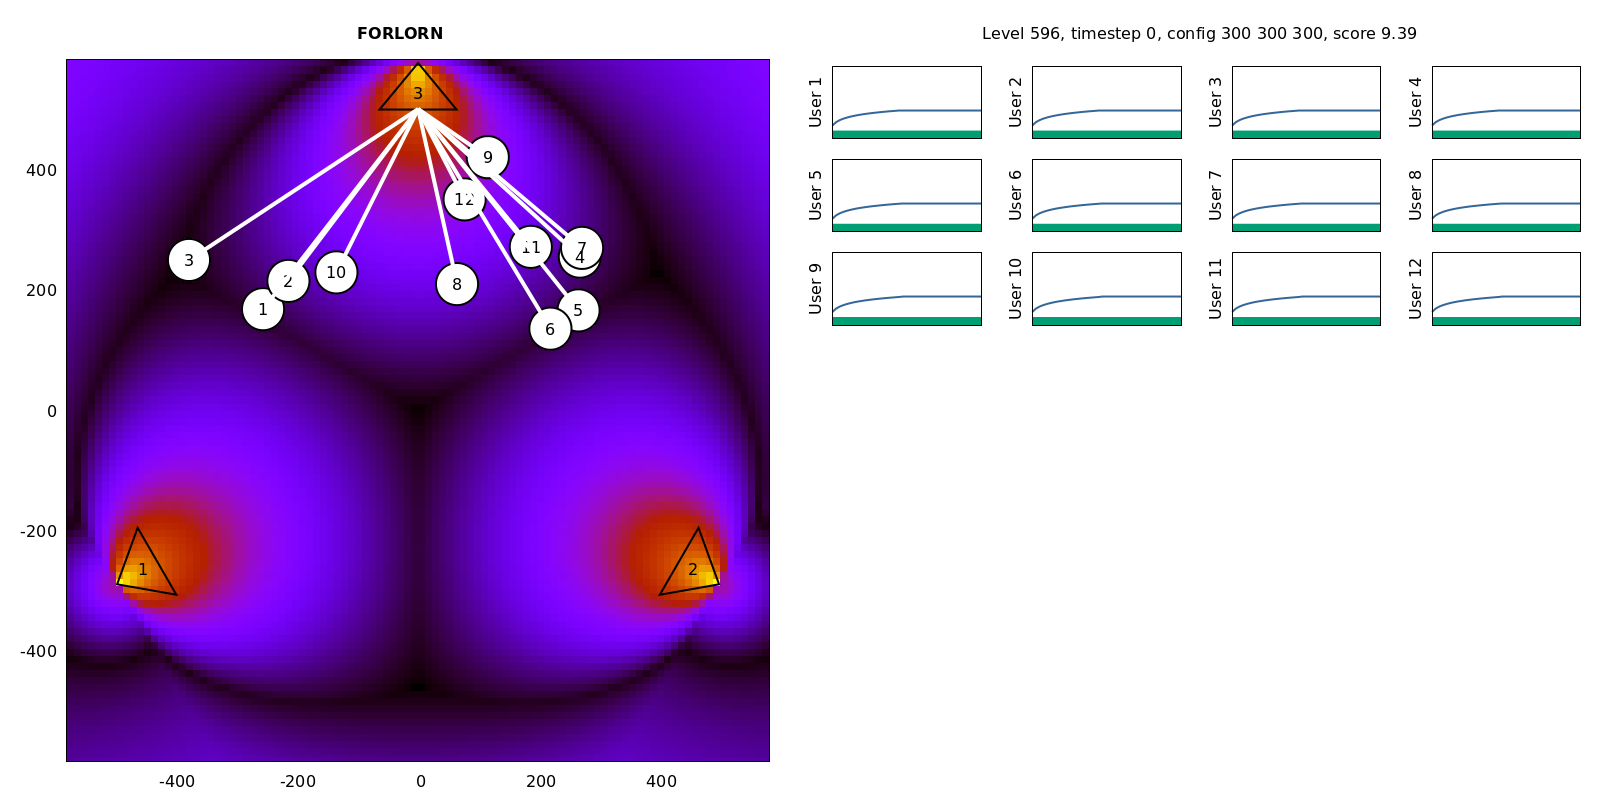

In [4]:
cell_combinations = sorted(list(set(r[1][0] for r in results if r[1][0] is not None)))
for c in cell_combinations:
    n = 0
    for (seed, (cell_combination, output_log)) in results:
        if cell_combination == c:
            n += 1
            if n > 5:
                break
            png_data = visualizer.SimulationRenderer.render_final_frame(output_log)
            IPython.display.display_png(png_data, raw=True)